In [ ]:
from google.colab import drive
import pandas as pd
import os # Import os untuk operasi path

# Mount Google Drive supaya bisa akses file
drive.mount('/content/drive')

# Setelah mount, sesuaikan path file CSV sesuai lokasi di Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/ML FINAL2/Copy of skintific.csv'

# TENTUKAN PATH LOKASI PENYIMPANAN BARU SESUAI PERMINTAAN USER
output_base_dir = '/content/drive/MyDrive/Colab Notebooks/ML FINAL2'
# Buat direktori jika belum ada (exist_ok=True menghindari error jika sudah ada)
os.makedirs(output_base_dir, exist_ok=True)
print(f"Direktori penyimpanan output telah disiapkan di: {output_base_dir}")

# Baca dataset CSV ke DataFrame
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dari dataset
print(df.head())

Mounted at /content/drive
Direktori penyimpanan output telah disiapkan di: /content/drive/MyDrive/Colab Notebooks/ML FINAL2
             name                      skin_type        date date_original  \
0      saraslayyy      Combination, Medium, Warm  2025-10-12     a day ago   
1        Tazqiyya  Normal, Medium Light, Neutral  2025-10-11    2 days ago   
2  ratnakartika04   Combination, Medium, Neutral  2025-10-10    3 days ago   
3      nandysepti        Normal, Medium, Neutral  2025-10-07    6 days ago   
4          PENI74              Oily, Light, Warm  2025-10-06    7 days ago   

                                             comment  
0  I swear, ini moisturizer kayak pelukan buat ku...  
1  Sukaa banget sama teksturnyaa enak banget kalo...  
2  Pertama kali pake teksturnya, terasa ringan da...  
3  helpful bangettttttt, aku pakai ini pas kulit ...  
4  Aku dah lama pake skintofic ini. Aku type oily...  


#PRE PROCESSING

In [ ]:
import pandas as pd
print(df.head())
print(df.info())

# Pembersihan kolom 'comment'
df['comment'] = df['comment'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df['comment'] = df['comment'].str.lower()
df['comment'] = df['comment'].str.strip()
print("Cleaned 'comment' column by removing special characters, converting to lowercase, and stripping whitespace.")

# Pemrosesan Kolom 'skin_type' (One-Hot Encoding)
skin_types_split = df['skin_type'].str.get_dummies(sep=', ')
df = pd.concat([df, skin_types_split], axis=1)
print("Processed 'skin_type' column and created dummy variables.")

# Penghapusan Kolom
df = df.drop('skin_type', axis=1)
print("Kolom 'skin_type' telah dihapus.")
df = df.drop('date_original', axis=1)
print("Dropped 'date_original' column.")

             name                      skin_type        date date_original  \
0      saraslayyy      Combination, Medium, Warm  2025-10-12     a day ago   
1        Tazqiyya  Normal, Medium Light, Neutral  2025-10-11    2 days ago   
2  ratnakartika04   Combination, Medium, Neutral  2025-10-10    3 days ago   
3      nandysepti        Normal, Medium, Neutral  2025-10-07    6 days ago   
4          PENI74              Oily, Light, Warm  2025-10-06    7 days ago   

                                             comment  
0  I swear, ini moisturizer kayak pelukan buat ku...  
1  Sukaa banget sama teksturnyaa enak banget kalo...  
2  Pertama kali pake teksturnya, terasa ringan da...  
3  helpful bangettttttt, aku pakai ini pas kulit ...  
4  Aku dah lama pake skintofic ini. Aku type oily...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name

In [ ]:
import pandas as pd
# Konversi kolom 'date' ke tipe datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("Converted 'date' column to datetime type.")

print(f"Jumlah nilai NaT di kolom 'date' sebelum penghapusan: {df['date'].isnull().sum()}")

# Hapus baris dengan nilai NaT di kolom 'date'
df.dropna(subset=['date'], inplace=True)

print(f"Jumlah nilai NaT di kolom 'date' setelah penghapusan: {df['date'].isnull().sum()}")
print("Baris dengan nilai NaT di kolom 'date' telah dihapus.")

print(df.info())
print(df.isnull().sum())

Converted 'date' column to datetime type.
Jumlah nilai NaT di kolom 'date' sebelum penghapusan: 1
Jumlah nilai NaT di kolom 'date' setelah penghapusan: 0
Baris dengan nilai NaT di kolom 'date' telah dihapus.
<class 'pandas.core.frame.DataFrame'>
Index: 1838 entries, 0 to 1838
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           1838 non-null   object        
 1   date           1838 non-null   datetime64[ns]
 2   comment        1838 non-null   object        
 3   ,18 and Under  1838 non-null   int64         
 4   ,19 - 24       1838 non-null   int64         
 5   ,25 - 29       1838 non-null   int64         
 6   ,30 - 34       1838 non-null   int64         
 7   ,35 - 39       1838 non-null   int64         
 8   ,45 and Above  1838 non-null   int64         
 9   Combination    1838 non-null   int64         
 10  Cool           1838 non-null   int64         
 11  Dark           1838 no

In [ ]:
import pandas as pd

# Identify columns that start with a comma
columns_to_rename = [col for col in df.columns if col.startswith(',')]

# Create a mapping for renaming
rename_mapping = {col: col.lstrip(',') for col in columns_to_rename}

# Rename the columns
df.rename(columns=rename_mapping, inplace=True)

print("Nama kolom dummy yang diawali dengan koma telah dibersihkan.")
print("Kolom setelah pembersihan:")
print(df.columns)

Nama kolom dummy yang diawali dengan koma telah dibersihkan.
Kolom setelah pembersihan:
Index(['name', 'date', 'comment', '18 and Under', '19 - 24', '25 - 29',
       '30 - 34', '35 - 39', '45 and Above', 'Combination', 'Cool', 'Dark',
       'Dry', 'Dry Skin', 'Light', 'Medium', 'Medium Dark', 'Medium Light',
       'Neutral', 'Normal', 'Oily', 'Oily Skin', 'Warm'],
      dtype='object')


In [ ]:
import os
import pandas as pd

# Save the raw 'comment' column to a CSV file in Google Drive
# Menggunakan output_base_dir
df['comment'].to_csv(os.path.join(output_base_dir, 'raw_comments.csv'), index=False)
print(f"Raw comments saved to '{os.path.join(output_base_dir, 'raw_comments.csv')}'")

print("Lima baris pertama dari DataFrame yang sudah diproses:")
print(df.head())
print("\nInformasi keseluruhan DataFrame setelah pemrosesan:")
print(df.info())
print("\nStatistik Deskriptif Kolom Numerik:\n")
print(df.describe())

# Simpan DataFrame final setelah pre-processing dasar
output_file_path_basic = os.path.join(output_base_dir, 'df_preprocessed_basic.csv')
df.to_csv(output_file_path_basic, index=False)
print(f"DataFrame setelah pre-processing dasar berhasil disimpan di '{output_file_path_basic}'")

Raw comments saved to '/content/drive/MyDrive/Colab Notebooks/ML FINAL2/raw_comments.csv'
Lima baris pertama dari DataFrame yang sudah diproses:
             name       date  \
0      saraslayyy 2025-10-12   
1        Tazqiyya 2025-10-11   
2  ratnakartika04 2025-10-10   
3      nandysepti 2025-10-07   
4          PENI74 2025-10-06   

                                             comment  18 and Under  19 - 24  \
0  i swear ini moisturizer kayak pelukan buat kul...             0        0   
1  sukaa banget sama teksturnyaa enak banget kalo...             0        0   
2  pertama kali pake teksturnya terasa ringan dan...             0        0   
3  helpful bangettttttt aku pakai ini pas kulit b...             0        0   
4  aku dah lama pake skintofic ini aku type oily ...             0        0   

   25 - 29  30 - 34  35 - 39  45 and Above  Combination  ...  Dry Skin  Light  \
0        0        0        0             0            1  ...         0      0   
1        0        0      

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt' tokenizer data if not already downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

nltk.download('punkt_tab')

print("NLTK punkt tokenizer is ready.")

# Apply tokenization to the 'comment' column
df['tokenized_comments'] = df['comment'].apply(word_tokenize)

# Display the first few entries of the new 'tokenized_comments' column
print("\nFirst 5 entries of 'tokenized_comments' column:")
print(df['tokenized_comments'].head())

print("Comments tokenized and stored in 'tokenized_comments' column.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK punkt tokenizer is ready.

First 5 entries of 'tokenized_comments' column:
0    [i, swear, ini, moisturizer, kayak, pelukan, b...
1    [sukaa, banget, sama, teksturnyaa, enak, bange...
2    [pertama, kali, pake, teksturnya, terasa, ring...
3    [helpful, bangettttttt, aku, pakai, ini, pas, ...
4    [aku, dah, lama, pake, skintofic, ini, aku, ty...
Name: tokenized_comments, dtype: object
Comments tokenized and stored in 'tokenized_comments' column.


In [ ]:
!pip install Sastrawi

import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Download necessary NLTK data if not already present
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Initialize Sastrawi StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords_sastrawi = factory.get_stop_words() # Corrected line: get stopwords list from the factory

# Function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    # Let's filter directly for tokenized_comments
    filtered_tokens = [word for word in tokens if word not in stopwords_sastrawi]
    return filtered_tokens

# Apply stopword removal to the 'tokenized_comments' column
df['tokenized_comments'] = df['tokenized_comments'].apply(remove_stopwords)

print("Stopwords removal from 'tokenized_comments' column complete.")
print("First 5 entries of 'tokenized_comments' after stopword removal:")
print(df['tokenized_comments'].head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stopwords removal from 'tokenized_comments' column complete.
First 5 entries of 'tokenized_comments' after stopword removal:
0    [i, swear, moisturizer, kayak, pelukan, buat, ...
1    [sukaa, banget, sama, teksturnyaa, enak, bange...
2    [pertama, kali, pake, teksturnya, terasa, ring...
3    [helpful, bangettttttt, aku, pakai, pas, kulit...
4    [aku, dah, lama, pake, skintofic, aku, type, o...
Name: tokenized_comments, dtype: object


In [ ]:
import os
import pandas as pd

# Define the path to save the tokenized comments after stopword removal
output_tokenized_comments_path = os.path.join(output_base_dir, 'tokenized_comments_no_stopwords.csv')

# Save the tokenized_comments column to a CSV file
df['tokenized_comments'].to_csv(output_tokenized_comments_path, index=False)

print(f"Tokenized comments after stopword removal saved to '{output_tokenized_comments_path}'")

# Define the path to save the final preprocessed DataFrame
output_file_path = os.path.join(output_base_dir, 'preprocessed_df.csv')

# Save the preprocessed DataFrame to a CSV file (termasuk kolom tokenized)
df.to_csv(output_file_path, index=False)

print(f"Final preprocessed DataFrame saved to '{output_file_path}'")

Tokenized comments after stopword removal saved to '/content/drive/MyDrive/Colab Notebooks/ML FINAL2/tokenized_comments_no_stopwords.csv'
Final preprocessed DataFrame saved to '/content/drive/MyDrive/Colab Notebooks/ML FINAL2/preprocessed_df.csv'


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib
import os
import pandas as pd
import numpy as np

# Pastikan Anda telah mendefinisikan output_base_dir dari langkah sebelumnya
# output_base_dir = '/content/drive/MyDrive/ML FINAL'

# Download the VADER lexicon if not already downloaded
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')
except nltk.downloader.DownloadError:
    nltk.download('vader_lexicon')

print("NLTK dan VADER lexicon telah siap.")

# --- 4.1. Analisis Sentimen dengan VADER ---

# Inisialisasi VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan skor sentimen compound
def get_sentiment_score(text):
    if isinstance(text, str):
        # Menggunakan skor 'compound'
        return sia.polarity_scores(text)['compound']
    return 0.0

# Terapkan analisis sentimen ke kolom 'comment'
df['sentiment_score'] = df['comment'].apply(get_sentiment_score)

# --- 4.2. Kategorisasi Sentimen (Revisi dengan 'Other') ---

# Fungsi untuk mengkategorikan skor sentimen
def categorize_sentiment(score):
    """
    Mengategorikan sentimen berdasarkan skor VADER:
    - Positive: Skor >= 0.05
    - Negative: Skor <= -0.05
    - Neutral: Skor TEPAT 0.0
    - Other: Skor di antara -0.05 dan 0.05, tetapi TIDAK TEPAT 0.0
    """
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    elif score == 0.0:
        return 'Neutral'
    else:
        return 'Other' # Skor yang sangat mendekati 0, tetapi tidak 0 (e.g., 0.001, -0.005)

df['sentiment_category_en'] = df['sentiment_score'].apply(categorize_sentiment)

# Buat dictionary pemetaan dari label English ke Indonesian
sentiment_mapping = {
    'Positive': 'positif',
    'Negative': 'negatif',
    'Neutral': 'netral',
    'Other': 'other' # Tambahkan kategori 'other'
}

# Terapkan pemetaan ke kolom 'sentiment_category'
df['sentiment_category'] = df['sentiment_category_en'].map(sentiment_mapping)

print("\nKolom 'sentiment_score' dan 'sentiment_category' telah ditambahkan.")
print("Lima baris pertama dengan label sentimen:")
print(df[['comment', 'sentiment_score', 'sentiment_category']].head())

# --- 4.3. Label Encoding (Pembuatan Variabel Target 'y') ---

# Inisialisasi dan latih LabelEncoder
label_encoder = LabelEncoder()
# Variabel target y diisi dengan hasil label encoding
y = label_encoder.fit_transform(df['sentiment_category'])

print("\nLabelEncoder dilatih dan variabel target y (numerik) dibuat.")
print(f"Bentuk variabel target y: {y.shape}")
print(f"Mapping Label Encoding (Kelas Asli -> Numerik): {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# **DILETAKKAN DI DRIVE LOKASINYA DRIVE SAYA-ML FINAL**
# Simpan LabelEncoder
joblib.dump(label_encoder, os.path.join(output_base_dir, 'label_encoder.pkl'))
print(f"\nLabelEncoder disimpan di: {os.path.join(output_base_dir, 'label_encoder.pkl')}")

# Simpan DataFrame setelah analisis sentimen (termasuk sentiment_score dan category)
output_file_path_sentiment = os.path.join(output_base_dir, 'df_with_sentiment_revised.csv')
df.to_csv(output_file_path_sentiment, index=False)
print(f"DataFrame setelah analisis sentimen disimpan di: {output_file_path_sentiment}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


NLTK dan VADER lexicon telah siap.

Kolom 'sentiment_score' dan 'sentiment_category' telah ditambahkan.
Lima baris pertama dengan label sentimen:
                                             comment  sentiment_score  \
0  i swear ini moisturizer kayak pelukan buat kul...          -0.0516   
1  sukaa banget sama teksturnyaa enak banget kalo...           0.0000   
2  pertama kali pake teksturnya terasa ringan dan...           0.0000   
3  helpful bangettttttt aku pakai ini pas kulit b...           0.4215   
4  aku dah lama pake skintofic ini aku type oily ...           0.0000   

  sentiment_category  
0            negatif  
1             netral  
2             netral  
3            positif  
4             netral  

LabelEncoder dilatih dan variabel target y (numerik) dibuat.
Bentuk variabel target y: (1838,)
Mapping Label Encoding (Kelas Asli -> Numerik): {'negatif': np.int64(0), 'netral': np.int64(1), 'other': np.int64(2), 'positif': np.int64(3)}

LabelEncoder disimpan di: /content/dri


Distribusi Sentimen:
sentiment_category
netral     867
positif    669
negatif    294
other        8
Name: count, dtype: int64


/tmp/ipython-input-2345978250.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Plot Distribusi Sentimen disimpan di: /content/drive/MyDrive/Colab Notebooks/ML FINAL2/sentiment_distribution_gradient_custom.png


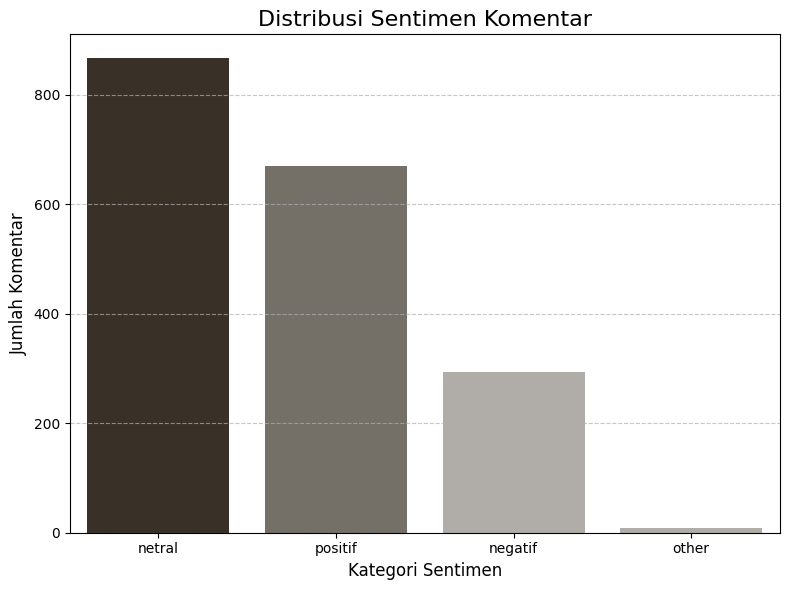

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from matplotlib.colors import to_rgb, to_hex # Diperlukan untuk manipulasi warna

# Asumsi df dan output_base_dir sudah terdefinisi

# --- 4.4. Visualisasi Distribusi Sentimen ---

# Hitung distribusi frekuensi
sentiment_counts = df['sentiment_category'].value_counts()
# Urutkan berdasarkan nilai (frekuensi) secara menurun
sentiment_counts = sentiment_counts.sort_values(ascending=False)

print("\nDistribusi Sentimen:")
print(sentiment_counts)

# Tentukan warna dasar yang diinginkan
BASE_COLOR = '#3c3224'

# Fungsi untuk membuat gradasi warna (sederhana: mencampur dengan putih)
# Warna yang lebih tinggi akan lebih dekat ke BASE_COLOR, yang lebih rendah akan lebih terang.
def create_gradient_palette(base_hex, n_colors):
    """
    Menghasilkan palet gradasi dari warna dasar ke warna yang lebih terang.
    """
    base_rgb = to_rgb(base_hex)
    tints = []
    # Logika: Mencampur warna dasar dengan putih (1, 1, 1)
    for i in range(n_colors):
        # Hitung faktor blending (semakin besar i/n_colors, semakin dekat ke putih)
        # Kita balik faktornya agar bar pertama (tertinggi) menjadi warna dasar penuh.
        # Faktornya harus menurun dari 1 (untuk bar pertama) ke nilai yang lebih kecil.
        # Jika ada 3 kategori (0, 1, 2), faktornya: 1.0, 0.7, 0.4 (misalnya)
        factor = 1.0 - (i * 0.3)
        if factor < 0.4: factor = 0.4 # Batasi warna paling terang

        # Hitung warna campuran: color = factor * base + (1 - factor) * white
        new_rgb = (
            base_rgb[0] * factor + (1 - factor) * 1.0,
            base_rgb[1] * factor + (1 - factor) * 1.0,
            base_rgb[2] * factor + (1 - factor) * 1.0,
        )
        tints.append(to_hex(new_rgb))

    return tints

# Buat palet dengan jumlah warna yang sesuai dengan jumlah kategori
n_categories = len(sentiment_counts)
custom_palette = create_gradient_palette(BASE_COLOR, n_categories)

# Visualisasi
plt.figure(figsize=(8, 6))

# Gunakan palet kustom yang sudah diurutkan (warna paling gelap untuk nilai tertinggi)
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette=custom_palette,
    legend=False
)

plt.title('Distribusi Sentimen Komentar', fontsize=16)
plt.xlabel('Kategori Sentimen', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Simpan Plot Distribusi Sentimen
sentiment_plot_path = os.path.join(output_base_dir, 'sentiment_distribution_gradient_custom.png')
plt.savefig(sentiment_plot_path)
print(f"Plot Distribusi Sentimen disimpan di: {sentiment_plot_path}")
plt.show()

#EKSTRAKSI FITUR

In [ ]:
import pandas as pd

numerical_cols = [
    '18 and Under', '19 - 24', '25 - 29', '30 - 34', '35 - 39', '45 and Above',
    'Combination', 'Cool', 'Dark', 'Dry', 'Dry Skin', 'Light', 'Medium',
    'Medium Dark', 'Medium Light', 'Neutral', 'Normal', 'Oily', 'Oily Skin', 'Warm'
]

df_numerical = df[numerical_cols]

print("Selected numerical features DataFrame created with shape:", df_numerical.shape)
print("First 5 rows of selected numerical features:")
print(df_numerical.head())

# **Simpan DataFrame Fitur Numerik (Lokasi Baru)**
df_numerical_path = os.path.join(output_base_dir, 'df_numerical_features.csv')
df_numerical.to_csv(df_numerical_path, index=False)
print(f"DataFrame fitur numerik disimpan di '{df_numerical_path}'")

Selected numerical features DataFrame created with shape: (1838, 20)
First 5 rows of selected numerical features:
   18 and Under  19 - 24  25 - 29  30 - 34  35 - 39  45 and Above  \
0             0        0        0        0        0             0   
1             0        0        0        0        0             0   
2             0        0        0        0        0             0   
3             0        0        0        0        0             0   
4             0        0        0        0        0             0   

   Combination  Cool  Dark  Dry  Dry Skin  Light  Medium  Medium Dark  \
0            1     0     0    0         0      0       1            0   
1            0     0     0    0         0      0       0            0   
2            1     0     0    0         0      0       1            0   
3            0     0     0    0         0      0       1            0   
4            0     0     0    0         0      1       0            0   

   Medium Light  Neutral  Normal

#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import joblib # Tambahkan import joblib
import os # Pastikan os terimport

# Initialize TfidfVectorizer
# Using max_features to limit the number of features (words) to the most frequent 5000
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the 'comment' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['comment'])

# Convert the TF-IDF matrix to a Pandas DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF feature extraction complete. df_tfidf created with shape:", df_tfidf.shape)
print("First 5 rows of df_tfidf:")
print(df_tfidf.head())

# Gabungkan Fitur TF-IDF dan Numerik (X)
import pandas as pd
# Ensure both dataframes have the same index for correct concatenation
df_numerical.reset_index(drop=True, inplace=True)
df_tfidf.reset_index(drop=True, inplace=True)

# Combine TF-IDF features with numerical features
X = pd.concat([df_numerical, df_tfidf], axis=1)

print("Combined feature matrix X created with shape:", X.shape)
print("First 5 rows of the combined feature matrix:")
print(X.head())

print(f"Final shape of the combined feature matrix (X): {X.shape}")
print("The matrix X now contains a comprehensive set of features, including:")
print("- TF-IDF features extracted from the 'comment' text data (representing word importance).")
print("- Numerical features representing various skin types and age groups (one-hot encoded).")
print("These features are now ready for further machine learning tasks such as modeling.")

# **Simpan Vectorizer TF-IDF dan Feature Matrix X (Lokasi Baru)**
joblib.dump(tfidf_vectorizer, os.path.join(output_base_dir, 'tfidf_vectorizer.pkl'))
print(f"TfidfVectorizer object saved to '{os.path.join(output_base_dir, 'tfidf_vectorizer.pkl')}'")

df_tfidf.to_csv(os.path.join(output_base_dir, 'tfidf_features.csv'), index=False)
print(f"TF-IDF features saved to '{os.path.join(output_base_dir, 'tfidf_features.csv')}'")

X_path = os.path.join(output_base_dir, 'X_combined_tfidf.csv')
X.to_csv(X_path, index=False)
print(f"Combined Feature Matrix X (TF-IDF) saved to '{X_path}'")

TF-IDF feature extraction complete. df_tfidf created with shape: (1838, 5000)
First 5 rows of df_tfidf:
   aaaa  aaaaa  aaaaaaaaaaaa  abal  abalkarena  abanget  abangku  abiesssss  \
0   0.0    0.0           0.0   0.0         0.0      0.0      0.0        0.0   
1   0.0    0.0           0.0   0.0         0.0      0.0      0.0        0.0   
2   0.0    0.0           0.0   0.0         0.0      0.0      0.0        0.0   
3   0.0    0.0           0.0   0.0         0.0      0.0      0.0        0.0   
4   0.0    0.0           0.0   0.0         0.0      0.0      0.0        0.0   

   abiez  abis  ...  you  your   yq  ysl  yuhuuuu  yuk  yuklah  yuu  zone  \
0    0.0   0.0  ...  0.0   0.0  0.0  0.0      0.0  0.0     0.0  0.0   0.0   
1    0.0   0.0  ...  0.0   0.0  0.0  0.0      0.0  0.0     0.0  0.0   0.0   
2    0.0   0.0  ...  0.0   0.0  0.0  0.0      0.0  0.0     0.0  0.0   0.0   
3    0.0   0.0  ...  0.0   0.0  0.0  0.0      0.0  0.0     0.0  0.0   0.0   
4    0.0   0.0  ...  0.0   0.0  0.0 

#BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import joblib # Tambahkan import joblib
import os # Pastikan os terimport

# Initialize CountVectorizer
# Using max_features to limit the number of features (words) to the most frequent 5000
count_vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the 'comment' column
bow_matrix = count_vectorizer.fit_transform(df['comment'])

# Convert the BoW matrix to a Pandas DataFrame
df_bow_features = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

print("Bag-of-Words feature extraction complete. df_bow_features created with shape:", df_bow_features.shape)
print("First 5 rows of df_bow_features:")
print(df_bow_features.head())

# Gabungkan Fitur BoW dan Numerik (X_combined_bow)
import pandas as pd

# Ensure both dataframes have the same index for correct concatenation
df_numerical.reset_index(drop=True, inplace=True)
df_bow_features.reset_index(drop=True, inplace=True)

# Combine BoW features with numerical features
X_combined_bow = pd.concat([df_numerical, df_bow_features], axis=1)

print("Combined feature matrix X_combined_bow created with shape:", X_combined_bow.shape)
print("First 5 rows of the combined feature matrix:")
print(X_combined_bow.head())
print(f"Shape of the combined feature matrix (X_combined_bow): {X_combined_bow.shape}")
print("First 5 rows of X_combined_bow:")
print(X_combined_bow.head())

# **Simpan Vectorizer BoW dan Feature Matrix X_combined_bow (Lokasi Baru)**
joblib.dump(count_vectorizer, os.path.join(output_base_dir, 'count_vectorizer.pkl'))
print(f"CountVectorizer object saved to '{os.path.join(output_base_dir, 'count_vectorizer.pkl')}'")

X_combined_bow_path = os.path.join(output_base_dir, 'X_combined_bow.csv')
X_combined_bow.to_csv(X_combined_bow_path, index=False)
print(f"Combined Feature Matrix X_combined_bow saved to '{X_combined_bow_path}'")

Bag-of-Words feature extraction complete. df_bow_features created with shape: (1838, 5000)
First 5 rows of df_bow_features:
   aaaa  aaaaa  aaaaaaaaaaaa  abal  abalkarena  abanget  abangku  abiesssss  \
0     0      0             0     0           0        0        0          0   
1     0      0             0     0           0        0        0          0   
2     0      0             0     0           0        0        0          0   
3     0      0             0     0           0        0        0          0   
4     0      0             0     0           0        0        0          0   

   abiez  abis  ...  you  your  yq  ysl  yuhuuuu  yuk  yuklah  yuu  zone  zonk  
0      0     0  ...    0     0   0    0        0    0       0    0     0     0  
1      0     0  ...    0     0   0    0        0    0       0    0     0     0  
2      0     0  ...    0     0   0    0        0    0       0    0     0     0  
3      0     0  ...    0     0   0    0        0    0       0    0     0     

#N-GRAM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import joblib # Tambahkan import joblib
import os # Pastikan os terimport

# Initialize CountVectorizer with ngram_range=(1, 2) for unigrams and bigrams
# Limiting max_features to 5000 to manage dimensionality
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)

# Fit and transform the 'comment' column to get the N-gram features
ngram_matrix = ngram_vectorizer.fit_transform(df['comment'])

# Convert the N-gram matrix to a Pandas DataFrame
df_ngram_features = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_vectorizer.get_feature_names_out())

print("N-gram (unigram and bigram) feature extraction complete.")
print(f"df_ngram_features created with shape: {df_ngram_features.shape}")
print("First 5 rows of df_ngram_features:")
print(df_ngram_features.head())

# Gabungkan Fitur N-gram dan Numerik (X_combined_ngram)
import pandas as pd

# Ensure both dataframes have the same index for correct concatenation
df_numerical.reset_index(drop=True, inplace=True)
df_ngram_features.reset_index(drop=True, inplace=True)

# Combine N-gram features with numerical features
X_combined_ngram = pd.concat([df_numerical, df_ngram_features], axis=1)

print("Combined feature matrix X_combined_ngram created with shape:", X_combined_ngram.shape)
print("First 5 rows of the combined feature matrix:")
print(X_combined_ngram.head())
print(f"Shape of the combined feature matrix (X_combined_ngram): {X_combined_ngram.shape}")
print("First 5 rows of X_combined_ngram:")
print(X_combined_ngram.head())

# **Simpan Vectorizer N-gram dan Feature Matrix X_combined_ngram (Lokasi Baru)**
joblib.dump(ngram_vectorizer, os.path.join(output_base_dir, 'ngram_vectorizer.pkl'))
print(f"NgramVectorizer object saved to '{os.path.join(output_base_dir, 'ngram_vectorizer.pkl')}'")

X_combined_ngram_path = os.path.join(output_base_dir, 'X_combined_ngram.csv')
X_combined_ngram.to_csv(X_combined_ngram_path, index=False)
print(f"Combined Feature Matrix X_combined_ngram saved to '{X_combined_ngram_path}'")

N-gram (unigram and bigram) feature extraction complete.
df_ngram_features created with shape: (1838, 5000)
First 5 rows of df_ngram_features:
   aaaa  abal  abis  abis exfoliasi  abis jar  abis make  abis pake  abisnya  \
0     0     0     0               0         0          0          0        0   
1     0     0     0               0         0          0          0        0   
2     0     0     0               0         0          0          0        0   
3     0     0     0               0         0          0          0        0   
4     0     0     0               0         0          0          0        0   

   abiss  ac  ...  yg suka  yg super  yg tadinya  yg udah  yg ukuran  you  \
0      0   0  ...        0         0           0        0          0    0   
1      0   0  ...        0         0           0        0          0    0   
2      0   0  ...        0         0           0        0          0    0   
3      0   0  ...        0         0           0        0          0

#WORD EMBEDDINGS

In [ ]:
!pip install gensim
from gensim.models import Word2Vec
import numpy as np # Tambahkan import numpy
import pandas as pd # Tambahkan import pandas
import os # Pastikan os terimport

# Prepare the tokenized comments for Word2Vec training
# Filter out empty lists from tokenized_comments if any
sentences = [comment for comment in df['tokenized_comments'] if comment]

# Train the Word2Vec model
# Parameters can be adjusted based on the dataset size and desired model complexity
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Print a success message
print("Word2Vec model trained successfully.")
print(f"Model has {len(model.wv)} word vectors.")

# Anda bisa menguji model dengan mencari kata serupa (contoh)
example_word = 'kulit'
if example_word in model.wv:
    print(f"\nWords similar to '{example_word}':")
    print(model.wv.most_similar(example_word))
else:
    print(f"\n'{example_word}' not found in model vocabulary.")

# Membuat Document Vectors
# Function to get document vector by averaging word vectors
def get_document_vector(words, model):
    vectors = []
    for word in words:
        if word in model.wv:
            vectors.append(model.wv[word])

    if vectors:
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector if no words are found in the model's vocabulary
        return np.zeros(model.vector_size)

# Apply the function to create document vectors for each comment
df['document_vector'] = df['tokenized_comments'].apply(lambda x: get_document_vector(x, model))

# Create a new DataFrame from the document vectors
df_doc_vectors = pd.DataFrame(df['document_vector'].tolist())

# Rename columns to 'vector_0', 'vector_1', etc.
df_doc_vectors.columns = [f'vector_{i}' for i in range(df_doc_vectors.shape[1])]

print("Document vectors created successfully.")
print(f"Shape of document vectors DataFrame: {df_doc_vectors.shape}")
print("First 5 rows of document vectors DataFrame:")
print(df_doc_vectors.head())

# Gabungkan Fitur Doc2Vec dan Numerik (X_combined)
# Ensure both dataframes have the same index for correct concatenation
df_numerical.reset_index(drop=True, inplace=True)
df_doc_vectors.reset_index(drop=True, inplace=True)

# Combine document vectors with numerical features
X_combined = pd.concat([df_numerical, df_doc_vectors], axis=1)

print("Combined feature matrix X_combined created with shape:", X_combined.shape)
print("First 5 rows of the combined feature matrix:")
print(X_combined.head())
print(f"Shape of the combined feature matrix (X_combined): {X_combined.shape}")
print("First 5 rows of X_combined:")
print(X_combined.head())

# **Simpan Model Word2Vec dan Feature Matrix X_combined (Doc2Vec) (Lokasi Baru)**
model.save(os.path.join(output_base_dir, 'word2vec_model.bin'))
print(f"Word2Vec model saved to '{os.path.join(output_base_dir, 'word2vec_model.bin')}'")

df_doc_vectors.to_csv(os.path.join(output_base_dir, 'doc_vectors_features.csv'), index=False)
print(f"Document vectors features saved to '{os.path.join(output_base_dir, 'doc_vectors_features.csv')}'")

X_combined_doc2vec_path = os.path.join(output_base_dir, 'X_combined_doc2vec.csv')
X_combined.to_csv(X_combined_doc2vec_path, index=False)
print(f"Combined Feature Matrix X_combined (Doc2Vec) saved to '{X_combined_doc2vec_path}'")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 26.5 MB/s eta 0:00:00
Word2Vec model trained successfully.
Model has 6035 word vectors.

Words similar to 'kulit':
[('berminyak', 0.9991555213928223), ('melembabkan', 0.9985690712928772), ('terasa', 0.9984792470932007), ('membuat', 0.9984371066093445), ('wajah', 0.9983803033828735), ('sensitif', 0.9983246326446533), ('bikin', 0.9982956051826477), ('lembab', 0.9982143640518188), ('tekstur', 0.9979889392852783), ('sangat', 0.9979346990585327)]
Document vectors created successfully.
Shape of document vectors DataFrame: (1838, 100)
First 5 rows of document vectors DataFrame:
   vector_0  vector_1  vector_2  vector_3  vector_4  vector_5  vector_6  \
0 -0.307671  0.459858  0.005322 -0.011652  0.140639 -0.724122  0.166821   
1 -0.268984  0.404368 -0.002159 -0.015549  0.123042 -0.632303  0.146648   
2 -0.324494  0.492040 -0.009071 -0.028299  0.144096 -0.747620  0.177347   
3 -0.362153  0.551433  0.001709 -0.024445  0.157560 -0.844651  0.

#EDA

Distribusi Frekuensi Tipe Kulit:
Neutral         1202
Combination      750
Medium Light     674
Medium           667
Oily             450
Warm             287
Normal           281
Dry              260
Cool             255
Light            229
Medium Dark      158
Dark              16
Dry Skin           2
Oily Skin          1
dtype: int64
Plot Distribusi Tipe Kulit disimpan di '/content/drive/MyDrive/Colab Notebooks/ML FINAL2/skin_type_distribution.png'


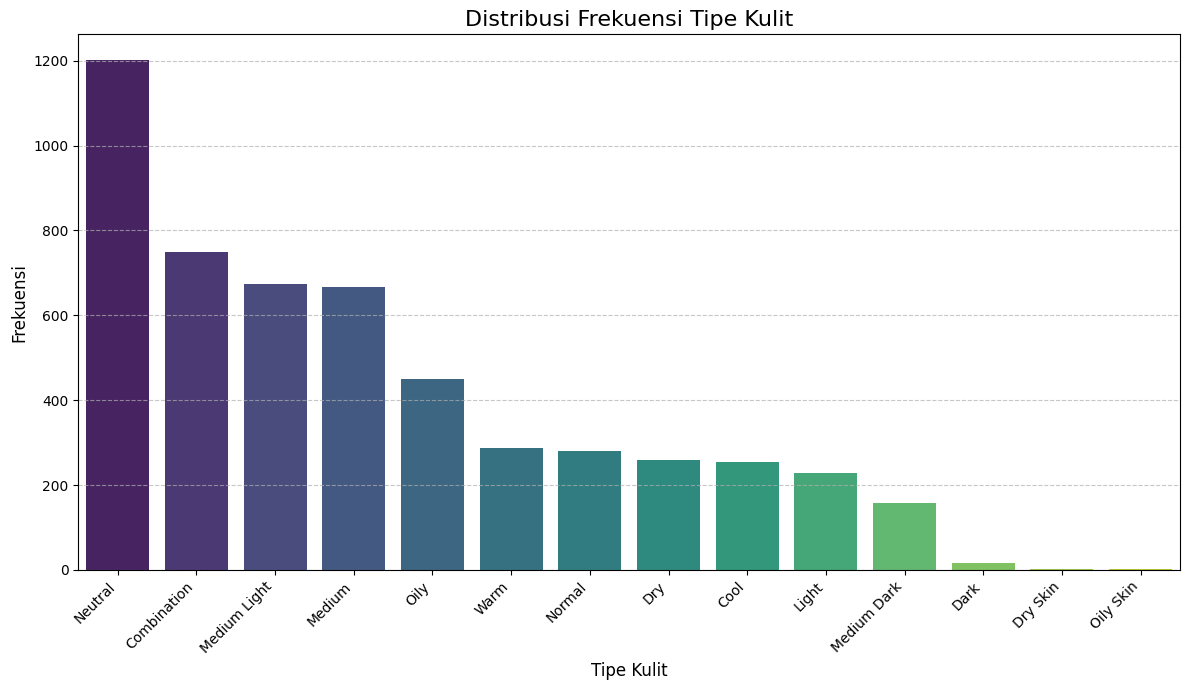

Bar chart showing the frequency distribution of skin types has been generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# Daftar kolom one-hot encoded yang mewakili Tipe Kulit (berdasarkan Langkah 2.1 & 5.1)
# Ini adalah cara yang lebih aman daripada menggunakan list comprehension yang terlalu umum.
expected_skin_cols = [
    'Combination', 'Cool', 'Dark', 'Dry', 'Dry Skin', 'Light', 'Medium',
    'Medium Dark', 'Medium Light', 'Neutral', 'Normal', 'Oily', 'Oily Skin', 'Warm'
]

# Filter df.columns untuk mengambil hanya kolom tipe kulit yang ada di DataFrame
skin_type_cols = [col for col in expected_skin_cols if col in df.columns]

if not skin_type_cols:
    print("Error: Kolom tipe kulit tidak ditemukan di DataFrame. Mohon periksa kembali langkah-langkah pre-processing Anda.")
else:
    # Perhitungan sekarang aman karena hanya kolom 0/1 yang digunakan
    # Calculate the frequency of each skin type
    skin_type_counts = df[skin_type_cols].sum().sort_values(ascending=False)

    # Print the frequency distribution
    print("Distribusi Frekuensi Tipe Kulit:")
    print(skin_type_counts)

    # Create a bar chart for the distribution
    plt.figure(figsize=(12, 7))
    sns.barplot(x=skin_type_counts.index, y=skin_type_counts.values, palette='viridis', hue=skin_type_counts.index, legend=False)
    plt.title('Distribusi Frekuensi Tipe Kulit', fontsize=16)
    plt.xlabel('Tipe Kulit', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # **Simpan Plot Distribusi Tipe Kulit (Lokasi Baru)**
    skin_type_plot_path = os.path.join(output_base_dir, 'skin_type_distribution.png')
    plt.savefig(skin_type_plot_path)
    print(f"Plot Distribusi Tipe Kulit disimpan di '{skin_type_plot_path}'")
    plt.show()

    print("Bar chart showing the frequency distribution of skin types has been generated.")

Word Cloud disimpan di '/content/drive/MyDrive/Colab Notebooks/ML FINAL2/word_cloud_comments.png'


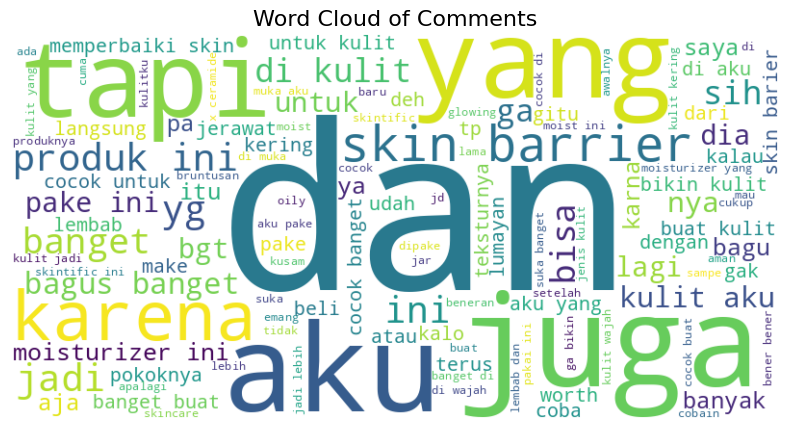

Word cloud generated and displayed.


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import os

# Combine all comments into a single string
all_comments = ' '.join(df['comment'].astype(str))

# Define stopwords.
stopwords = set(STOPWORDS)
# Add custom Indonesian stopwords if needed
# indonesian_stopwords = set(['dan', 'yang', 'untuk', 'ini', 'itu', 'di', 'pada', 'dengan', 'ada', 'tidak', 'saya', 'nya', 'kali'])
# stopwords.update(indonesian_stopwords)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(all_comments)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments', fontsize=16)

# **Simpan Word Cloud (Lokasi Baru)**
wordcloud_path = os.path.join(output_base_dir, 'word_cloud_comments.png')
plt.savefig(wordcloud_path)
print(f"Word Cloud disimpan di '{wordcloud_path}'")
plt.show()

print("Word cloud generated and displayed.")

Review counts over time (first 10 entries):
date
2023-11-03     96
2023-11-04    106
2023-11-05     87
2023-11-06      3
2023-11-07      4
2023-11-08      4
2023-11-09      1
2023-11-10      1
2023-11-11      3
2023-11-12      3
Name: count, dtype: int64
Plot Tren Ulasan disimpan di '/content/drive/MyDrive/Colab Notebooks/ML FINAL2/review_trend_over_time.png'


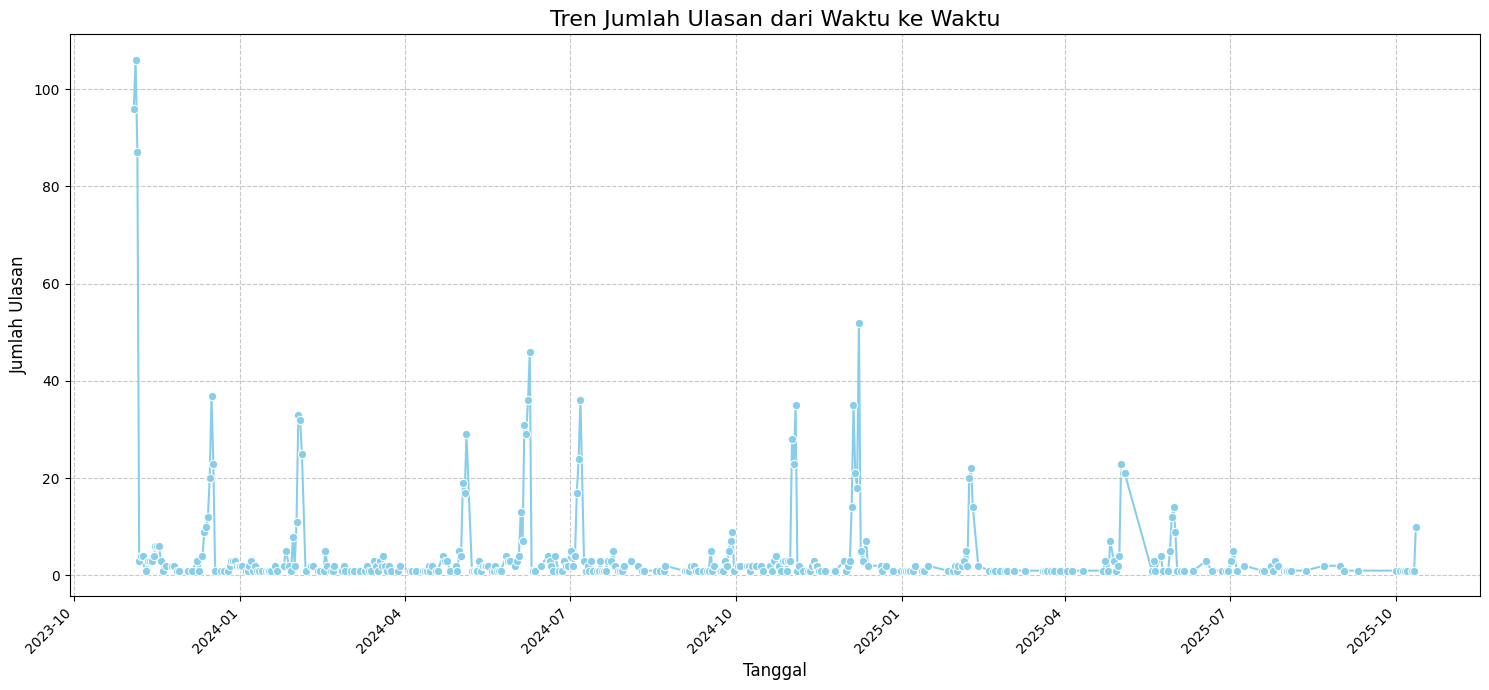

Line plot showing the trend of review counts over time has been generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Count reviews per day
reviews_over_time = df['date'].value_counts().sort_index()

print("Review counts over time (first 10 entries):")
print(reviews_over_time.head(10))

# Visualize the trend of review counts over time
plt.figure(figsize=(15, 7))
sns.lineplot(x=reviews_over_time.index, y=reviews_over_time.values, marker='o', color='skyblue')
plt.title('Tren Jumlah Ulasan dari Waktu ke Waktu', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# **Simpan Plot Tren Ulasan (Lokasi Baru)**
review_trend_path = os.path.join(output_base_dir, 'review_trend_over_time.png')
plt.savefig(review_trend_path)
print(f"Plot Tren Ulasan disimpan di '{review_trend_path}'")
plt.show()

print("Line plot showing the trend of review counts over time has been generated.")

#SELEKSI FITUR

#TF-IDF+X

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Initialize SelectKBest with f_classif and set k to 50
selector = SelectKBest(score_func=f_classif, k=50)

# Fit the selector to the feature matrix X and target variable y
selector.fit(X, y)

print("SelectKBest with f_classif fitted successfully.")
print(f"Number of features selected: {selector.get_support().sum()}")

X_selected = selector.transform(X)

print("Feature selection complete. New feature matrix X_selected created with shape:", X_selected.shape)
print("First 5 rows of X_selected (features selected by SelectKBest):")
print(X_selected[:5])

import pandas as pd

# 1. Dapatkan mask boolean dari fitur-fitur yang terpilih
selected_features_mask = selector.get_support()

# 2. Dapatkan nama-nama fitur asli dari DataFrame X
original_feature_names = X.columns

# 3. Filter nama-nama fitur asli menggunakan mask boolean
selected_feature_names = original_feature_names[selected_features_mask]

# 4. Dapatkan skor relevansi untuk semua fitur
feature_scores = selector.scores_

# 5. Buat DataFrame baru yang berisi nama fitur terpilih dan skor relevansinya
# Hanya ambil skor untuk fitur yang terpilih
selected_feature_scores = feature_scores[selected_features_mask]

df_selected_features = pd.DataFrame({
    'Feature': selected_feature_names,
    'Score': selected_feature_scores
})

# 6. Cetak atau tampilkan DataFrame ini, diurutkan berdasarkan skor relevansi
df_selected_features_sorted = df_selected_features.sort_values(by='Score', ascending=False)

print("Fitur yang dipilih oleh SelectKBest dan skor relevansinya:")
print(df_selected_features_sorted.to_string())

import pandas as pd

# Buat DataFrame baru dengan fitur yang dipilih dan nama kolom yang relevan
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Tampilkan lima baris pertama dari DataFrame X_selected_df
print("First 5 rows of X_selected_df:")
print(X_selected_df.head())

# Tampilkan bentuk (shape) dari DataFrame X_selected_df
print(f"\nShape of X_selected_df: {X_selected_df.shape}")

SelectKBest with f_classif fitted successfully.
Number of features selected: 50
Feature selection complete. New feature matrix X_selected created with shape: (1838, 50)
First 5 rows of X_selected (features selected by SelectKBest):
[[0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.      

#CHI2+BOW

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Initialize SelectKBest with f_classif and set k to 50
selector = SelectKBest(score_func=f_classif, k=50)

# Fit the selector to the feature matrix X and target variable y
selector.fit(X, y)

print("SelectKBest with f_classif fitted successfully.")
print(f"Number of features selected: {selector.get_support().sum()}")

X_selected = selector.transform(X)

print("Feature selection complete. New feature matrix X_selected created with shape:", X_selected.shape)
print("First 5 rows of X_selected (features selected by SelectKBest):")
print(X_selected[:5])

import pandas as pd

# 1. Dapatkan mask boolean dari fitur-fitur yang terpilih
selected_features_mask = selector.get_support()

# 2. Dapatkan nama-nama fitur asli dari DataFrame X
original_feature_names = X.columns

# 3. Filter nama-nama fitur asli menggunakan mask boolean
selected_feature_names = original_feature_names[selected_features_mask]

# 4. Dapatkan skor relevansi untuk semua fitur
feature_scores = selector.scores_

# 5. Buat DataFrame baru yang berisi nama fitur terpilih dan skor relevansinya
# Hanya ambil skor untuk fitur yang terpilih
selected_feature_scores = feature_scores[selected_features_mask]

df_selected_features = pd.DataFrame({
    'Feature': selected_feature_names,
    'Score': selected_feature_scores
})

# 6. Cetak atau tampilkan DataFrame ini, diurutkan berdasarkan skor relevansi
df_selected_features_sorted = df_selected_features.sort_values(by='Score', ascending=False)

print("Fitur yang dipilih oleh SelectKBest dan skor relevansinya:")
print(df_selected_features_sorted.to_string())

import pandas as pd

# Buat DataFrame baru dengan fitur yang dipilih dan nama kolom yang relevan
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Tampilkan lima baris pertama dari DataFrame X_selected_df
print("First 5 rows of X_selected_df:")
print(X_selected_df.head())

# Tampilkan bentuk (shape) dari DataFrame X_selected_df
print(f"\nShape of X_selected_df: {X_selected_df.shape}")

SelectKBest with f_classif fitted successfully.
Number of features selected: 50
Feature selection complete. New feature matrix X_selected created with shape: (1838, 50)
First 5 rows of X_selected (features selected by SelectKBest):
[[0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.      

#CHI2+N-GRAM

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize SelectKBest with chi2 and set k to 50
selector_chi2_ngram = SelectKBest(score_func=chi2, k=50)

# Fit the selector to the feature matrix X_combined_ngram and target variable y
selector_chi2_ngram.fit(X_combined_ngram, y)

print("SelectKBest with chi2 fitted successfully for N-grams.")
print(f"Number of features selected by chi2 for N-grams: {selector_chi2_ngram.get_support().sum()}")

X_selected_chi2_ngram = selector_chi2_ngram.transform(X_combined_ngram)

print("Feature selection complete using chi2 for N-grams. New feature matrix X_selected_chi2_ngram created with shape:", X_selected_chi2_ngram.shape)
print("First 5 rows of X_selected_chi2_ngram (features selected by chi2 for N-grams):")
print(X_selected_chi2_ngram[:5])

import pandas as pd

# 1. Dapatkan mask boolean dari fitur-fitur yang terpilih oleh chi2 untuk N-gram
selected_features_mask_chi2_ngram = selector_chi2_ngram.get_support()

# 2. Dapatkan nama-nama fitur asli dari DataFrame X_combined_ngram
original_feature_names_chi2_ngram = X_combined_ngram.columns

# 3. Filter nama-nama fitur asli menggunakan mask boolean
selected_feature_names_chi2_ngram = original_feature_names_chi2_ngram[selected_features_mask_chi2_ngram]

# 4. Dapatkan skor relevansi untuk semua fitur
feature_scores_chi2_ngram = selector_chi2_ngram.scores_

# 5. Buat DataFrame baru yang berisi nama fitur terpilih dan skor relevansinya
# Hanya ambil skor untuk fitur yang terpilih
selected_feature_scores_chi2_ngram = feature_scores_chi2_ngram[selected_features_mask_chi2_ngram]

df_selected_features_chi2_ngram = pd.DataFrame({
    'Feature': selected_feature_names_chi2_ngram,
    'Score': selected_feature_scores_chi2_ngram
})

# 6. Cetak atau tampilkan DataFrame ini, diurutkan berdasarkan skor relevansi
df_selected_features_chi2_ngram_sorted = df_selected_features_chi2_ngram.sort_values(by='Score', ascending=False)

print("Fitur yang dipilih oleh SelectKBest dengan chi2 untuk N-gram dan skor relevansinya:")
print(df_selected_features_chi2_ngram_sorted.to_string())

import pandas as pd

# Buat DataFrame baru dengan fitur yang dipilih dan nama kolom yang relevan
X_selected_chi2_ngram_df = pd.DataFrame(X_selected_chi2_ngram, columns=selected_feature_names_chi2_ngram)

# Tampilkan lima baris pertama dari DataFrame X_selected_chi2_ngram_df
print("First 5 rows of X_selected_chi2_ngram_df:")
print(X_selected_chi2_ngram_df.head())

# Tampilkan bentuk (shape) dari DataFrame X_selected_chi2_ngram_df
print(f"\nShape of X_selected_chi2_ngram_df: {X_selected_chi2_ngram_df.shape}")

SelectKBest with chi2 fitted successfully for N-grams.
Number of features selected by chi2 for N-grams: 50
Feature selection complete using chi2 for N-grams. New feature matrix X_selected_chi2_ngram created with shape: (1838, 50)
First 5 rows of X_selected_chi2_ngram (features selected by chi2 for N-grams):
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Fitur yang dipilih oleh SelectKBest dengan chi2 untuk N-gram dan skor relevansinya:
                   Feature       Score
2                  barrier  823.364970
37 

#MODELLING & EVALUASI

#RANDOM FOREST + N-GRAM

In [ ]:
from sklearn.model_selection import train_test_split

# Split the selected N-gram features and target variable into training and testing sets
X_train_ngram, X_test_ngram, y_train_ngram, y_test_ngram = train_test_split(X_selected_chi2_ngram_df, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train_ngram: {X_train_ngram.shape}")
print(f"Shape of X_test_ngram: {X_test_ngram.shape}")
print(f"Shape of y_train_ngram: {y_train_ngram.shape}")
print(f"Shape of y_test_ngram: {y_test_ngram.shape}")
print("N-gram data split into training and testing sets successfully.")

from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
model_rf_ngram = RandomForestClassifier(random_state=42)

# Train the model using the training data
model_rf_ngram.fit(X_train_ngram, y_train_ngram)

print("RandomForestClassifier model for N-gram features has been successfully trained.")

y_pred_ngram = model_rf_ngram.predict(X_test_ngram)

print("Predictions have been made on the N-gram test data.")
print(f"Shape of y_pred_ngram: {y_pred_ngram.shape}")
print("First 5 predictions:")
print(y_pred_ngram[:5])

from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy_rf_ngram = accuracy_score(y_test_ngram, y_pred_ngram)
print(f"\nAccuracy for RandomForestClassifier (N-gram features): {accuracy_rf_ngram:.4f}")

# Generate a classification report (precision, recall, f1-score)
# Set zero_division=0 to handle cases where a class has no predicted samples gracefully
class_report_rf_ngram = classification_report(y_test_ngram, y_pred_ngram, target_names=label_encoder.classes_, zero_division=0)
print("\nClassification Report for RandomForestClassifier (N-gram features):\n", class_report_rf_ngram)
print("RandomForestClassifier model evaluation for N-gram features complete.")

Shape of X_train_ngram: (1470, 50)
Shape of X_test_ngram: (368, 50)
Shape of y_train_ngram: (1470,)
Shape of y_test_ngram: (368,)
N-gram data split into training and testing sets successfully.
RandomForestClassifier model for N-gram features has been successfully trained.
Predictions have been made on the N-gram test data.
Shape of y_pred_ngram: (368,)
First 5 predictions:
[0 0 3 0 3]

Accuracy for RandomForestClassifier (N-gram features): 0.8940

Classification Report for RandomForestClassifier (N-gram features):
               precision    recall  f1-score   support

     negatif       0.83      0.85      0.84        59
      netral       0.88      1.00      0.94       173
       other       0.00      0.00      0.00         2
     positif       0.95      0.79      0.87       134

    accuracy                           0.89       368
   macro avg       0.67      0.66      0.66       368
weighted avg       0.89      0.89      0.89       368

RandomForestClassifier model evaluation for 

Fitting 3 folds for each of 36 candidates, totalling 108 fits
GridSearchCV for RandomForestClassifier completed.

Best parameters for RandomForestClassifier (N-gram features): {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8476190476190476
Predictions made on the test set using the tuned model:
[0 0 3 0 3]

Accuracy for Tuned RandomForestClassifier (N-gram features): 0.8940

Classification Report for Tuned RandomForestClassifier (N-gram features):
               precision    recall  f1-score   support

     negatif       0.84      0.88      0.86        59
      netral       0.87      1.00      0.93       173
       other       0.00      0.00      0.00         2
     positif       0.97      0.78      0.86       134

    accuracy                           0.89       368
   macro avg       0.67      0.66      0.66       368
weighted avg       0.90      0.89      0.89       368

Tuned RandomForestClassifier model evaluation for N-gram fe

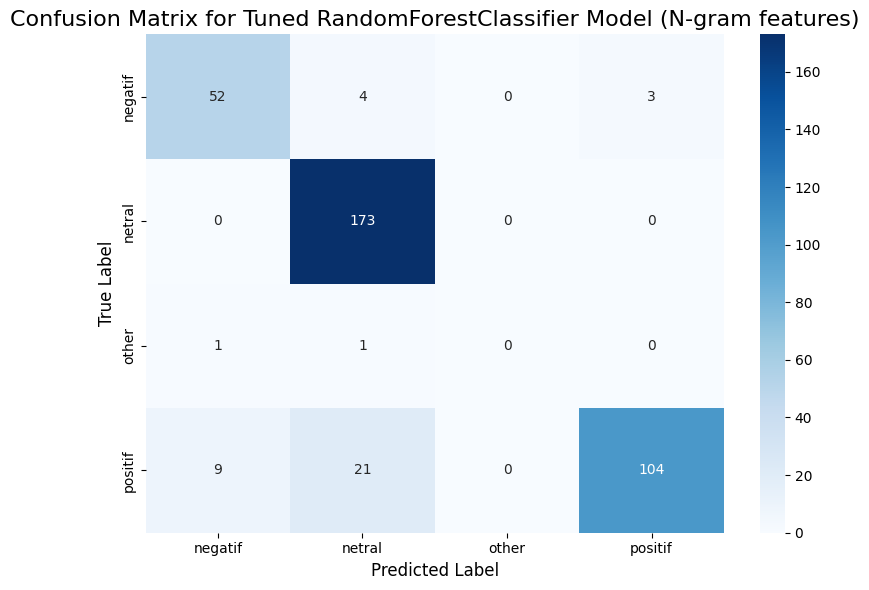

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 10, 20], # Maximum depth of the tree
    'min_samples_split': [2, 5], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2] # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), # Use the RandomForestClassifier model
                           param_grid=param_grid,
                           cv=3, # 3-fold cross-validation
                           n_jobs=-1, # Use all available CPU cores
                           verbose=2, # Display progress
                           scoring='accuracy') # Score models by accuracy

# Fit GridSearchCV to the training data
grid_search.fit(X_train_ngram, y_train_ngram)

print("GridSearchCV for RandomForestClassifier completed.")

# Use the best model found by grid search
model_rf_tuned_ngram = grid_search.best_estimator_
print("\nBest parameters for RandomForestClassifier (N-gram features):", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Make predictions on the test set using the tuned model
y_pred_tuned_ngram = model_rf_tuned_ngram.predict(X_test_ngram)

print("Predictions made on the test set using the tuned model:")
print(y_pred_tuned_ngram[:5])

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy for the tuned model
accuracy_tuned_rf_ngram = accuracy_score(y_test_ngram, y_pred_tuned_ngram)
print(f"\nAccuracy for Tuned RandomForestClassifier (N-gram features): {accuracy_tuned_rf_ngram:.4f}")

# Generate a classification report for the tuned model
# Set zero_division=0 to handle cases where a class has no predicted samples gracefully
class_report_tuned_rf_ngram = classification_report(y_test_ngram, y_pred_tuned_ngram, target_names=label_encoder.classes_, zero_division=0)
print("\nClassification Report for Tuned RandomForestClassifier (N-gram features):\n", class_report_tuned_rf_ngram)
print("Tuned RandomForestClassifier model evaluation for N-gram features complete.")

# Calculate confusion matrix for tuned RandomForestClassifier model
cm_tuned_rf = confusion_matrix(y_test_ngram, y_pred_tuned_ngram)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Tuned RandomForestClassifier Model (N-gram features)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

#SVC + N-GRAM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the selected N-gram features and target variable into training and testing sets
# Using the same split as for RandomForest for fair comparison
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_selected_chi2_ngram_df, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train_svm: {X_train_svm.shape}")
print(f"Shape of X_test_svm: {X_test_svm.shape}")
print(f"Shape of y_train_svm: {y_train_svm.shape}")
print(f"Shape of y_test_svm: {y_test_svm.shape}")
print("N-gram data split for SVM successfully.")

# Initialize the SVC model
model_svc = SVC(random_state=42)

# Train the model using the training data
model_svc.fit(X_train_svm, y_train_svm)

print("SVC model for N-gram features has been successfully trained.")

y_pred_svc = model_svc.predict(X_test_svm)

print("Predictions have been made on the N-gram test data using SVC.")
print(f"Shape of y_pred_svc: {y_pred_svc.shape}")
print("First 5 predictions:")
print(y_pred_svc[:5])

# Calculate accuracy
accuracy_svc = accuracy_score(y_test_svm, y_pred_svc)
print(f"\nAccuracy for SVC (N-gram features): {accuracy_svc:.4f}")

# Generate a classification report (precision, recall, f1-score)
class_report_svc = classification_report(y_test_svm, y_pred_svc, target_names=label_encoder.classes_, zero_division=0)
print("\nClassification Report for SVC (N-gram features):\n", class_report_svc)
print("SVC model evaluation for N-gram features complete.")

Shape of X_train_svm: (1470, 50)
Shape of X_test_svm: (368, 50)
Shape of y_train_svm: (1470,)
Shape of y_test_svm: (368,)
N-gram data split for SVM successfully.
SVC model for N-gram features has been successfully trained.
Predictions have been made on the N-gram test data using SVC.
Shape of y_pred_svc: (368,)
First 5 predictions:
[0 0 3 0 3]

Accuracy for SVC (N-gram features): 0.8804

Classification Report for SVC (N-gram features):
               precision    recall  f1-score   support

     negatif       0.82      0.83      0.82        59
      netral       0.87      0.99      0.93       173
       other       0.00      0.00      0.00         2
     positif       0.93      0.77      0.84       134

    accuracy                           0.88       368
   macro avg       0.65      0.65      0.65       368
weighted avg       0.88      0.88      0.88       368

SVC model evaluation for N-gram features complete.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV for SVC completed.

Best parameters for SVC (N-gram features): {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.8469387755102041
Predictions made on the test set using the tuned SVC model:
[0 0 3 0 3]

Accuracy for Tuned SVC (N-gram features): 0.8940

Classification Report for Tuned SVC (N-gram features):
               precision    recall  f1-score   support

     negatif       0.81      0.93      0.87        59
      netral       0.87      1.00      0.93       173
       other       0.00      0.00      0.00         2
     positif       0.99      0.75      0.86       134

    accuracy                           0.89       368
   macro avg       0.67      0.67      0.66       368
weighted avg       0.90      0.89      0.89       368

Tuned SVC model evaluation for N-gram features complete.


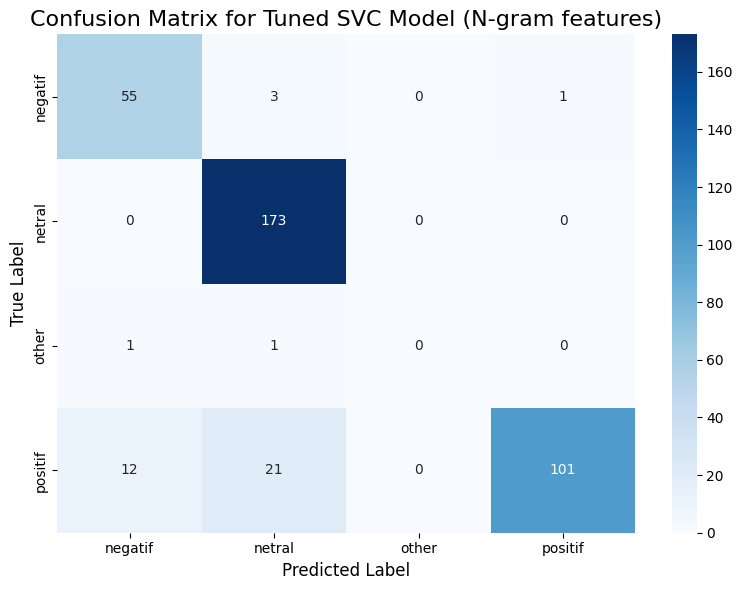

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(estimator=SVC(random_state=42), # Use the SVC model
                               param_grid=param_grid_svc,
                               cv=3, # 3-fold cross-validation
                               n_jobs=-1, # Use all available CPU cores
                               verbose=2, # Display progress
                               scoring='accuracy') # Score models by accuracy

# Fit GridSearchCV to the training data
grid_search_svc.fit(X_train_svm, y_train_svm)

print("GridSearchCV for SVC completed.")

# Use the best model found by grid search
model_svc_tuned = grid_search_svc.best_estimator_
print("\nBest parameters for SVC (N-gram features):", grid_search_svc.best_params_)
print("Best score:", grid_search_svc.best_score_)

# Make predictions on the test set using the tuned model
y_pred_tuned_svc = model_svc_tuned.predict(X_test_svm)

print("Predictions made on the test set using the tuned SVC model:")
print(y_pred_tuned_svc[:5])

# Calculate accuracy for the tuned model
accuracy_tuned_svc = accuracy_score(y_test_svm, y_pred_tuned_svc)
print(f"\nAccuracy for Tuned SVC (N-gram features): {accuracy_tuned_svc:.4f}")

# Generate a classification report for the tuned model
class_report_tuned_svc = classification_report(y_test_svm, y_pred_tuned_svc, target_names=label_encoder.classes_, zero_division=0)
print("\nClassification Report for Tuned SVC (N-gram features):\n", class_report_tuned_svc)
print("Tuned SVC model evaluation for N-gram features complete.")

# Calculate confusion matrix for tuned SVC model
cm_tuned_svc = confusion_matrix(y_test_svm, y_pred_tuned_svc)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Tuned SVC Model (N-gram features)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


#MLP DEEP LEARING + N-GRAM

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Convert X_train_ngram and X_test_ngram DataFrames to NumPy arrays
X_train_dl = X_train_ngram.values
X_test_dl = X_test_ngram.values

# One-hot encode y_train_ngram and y_test_ngram
y_train_dl = to_categorical(y_train_ngram, num_classes=len(label_encoder.classes_))
y_test_dl = to_categorical(y_test_ngram, num_classes=len(label_encoder.classes_))

# Print the shapes of the transformed data
print(f"Shape of X_train_dl: {X_train_dl.shape}")
print(f"Shape of X_test_dl: {X_test_dl.shape}")
print(f"Shape of y_train_dl: {y_train_dl.shape}")
print(f"Shape of y_test_dl: {y_test_dl.shape}")
print("Data prepared for deep learning models.")

Shape of X_train_dl: (1470, 50)
Shape of X_test_dl: (368, 50)
Shape of y_train_dl: (1470, 4)
Shape of y_test_dl: (368, 4)
Data prepared for deep learning models.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the input dimension (number of features)
input_dim = X_train_dl.shape[1]
num_classes = y_train_dl.shape[1]

# Build the MLP model
model_mlp = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)), # First hidden layer
    Dense(64, activation='relu'), # Second hidden layer
    Dense(num_classes, activation='softmax') # Output layer
])

# Compile the model
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()
print("MLP Deep Learning model built and compiled successfully.")

# Train the model
history = model_mlp.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
print("MLP Deep Learning model trained successfully.")

# Make predictions on the test set (probability scores)
y_pred_dl_prob = model_mlp.predict(X_test_dl)
# Convert probability scores to class labels
y_pred_dl = np.argmax(y_pred_dl_prob, axis=1)

# Get true labels for the test set
y_test_true_labels = np.argmax(y_test_dl, axis=1)

# Calculate accuracy
accuracy_dl = accuracy_score(y_test_true_labels, y_pred_dl)
print(f"\nAccuracy for MLP Deep Learning Model: {accuracy_dl:.4f}")

# Generate a classification report
class_report_dl = classification_report(y_test_true_labels, y_pred_dl, target_names=label_encoder.classes_, zero_division=0)
print("\nClassification Report for MLP Deep Learning Model:\n", class_report_dl)
print("MLP Deep Learning model evaluation complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,044 (58.77 KB)

 Trainable params: 15,044 (58.77 KB)

 Non-trainable params: 0 (0.00 B)

MLP Deep Learning model built and compiled successfully.
Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5778 - loss: 1.2671 - val_accuracy: 0.7007 - val_loss: 0.9421
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7420 - loss: 0.8593 - val_accuracy: 0.7755 - val_loss: 0.6500
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8239 - loss: 0.5795 - val_accuracy: 0.8231 - val_loss: 0.5396
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8566 - loss: 0.4857 - val_accuracy: 0.8299 - val_loss: 0.5003
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8589 - loss: 0.4471 - val_accuracy: 0.8367 - val_loss: 0.4740
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8539 - loss: 0.4422 - val_accuracy: 0.8299 - val_loss: 0.4700
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8526 - loss: 0.4406 - val_accuracy: 0.8333 - val_loss: 0.4796
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - ac

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


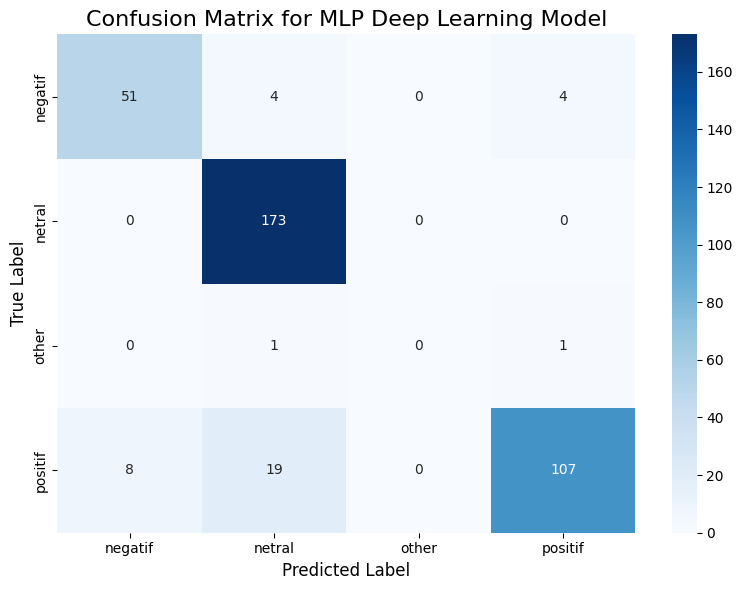

Confusion matrix for MLP Deep Learning model has been calculated and visualized.


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predicted labels for the test set
y_pred_dl_labels = np.argmax(model_mlp.predict(X_test_dl), axis=1)

# Get true labels for the test set
y_test_true_labels = np.argmax(y_test_dl, axis=1)

# Calculate confusion matrix
cm_mlp = confusion_matrix(y_test_true_labels, y_pred_dl_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for MLP Deep Learning Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print("Confusion matrix for MLP Deep Learning model has been calculated and visualized.")

ERROR ANALISIS

In [ ]:
# Analisis Kesalahan
import pandas as pd
import numpy as np

print("\n### Analisis Kesalahan untuk Model Tuned SVC (N-gram Features) ###")

# Identifikasi sampel yang salah diklasifikasikan
misclassified_indices_svc = np.where(y_test_svm != y_pred_tuned_svc)[0]

# Ambil indeks asli dari DataFrame untuk sampel uji
original_test_indices_svc = X_test_svm.index[misclassified_indices_svc]

# Ambil komentar, label sebenarnya, dan label prediksi untuk sampel yang salah diklasifikasikan
misclassified_data_svc = df.loc[original_test_indices_svc, ['comment']].copy()
misclassified_data_svc['True_Sentiment'] = label_encoder.inverse_transform(y_test_svm[misclassified_indices_svc])
misclassified_data_svc['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_tuned_svc[misclassified_indices_svc])

print(f"\nJumlah sampel yang salah diklasifikasikan oleh Tuned SVC: {len(misclassified_data_svc)}")
print("\nBeberapa contoh komentar yang salah diklasifikasikan oleh Tuned SVC:")
# Tampilkan 10 contoh pertama
print(misclassified_data_svc.head(10).to_string())


### Analisis Kesalahan untuk Model Tuned SVC (N-gram Features) ###

Jumlah sampel yang salah diklasifikasikan oleh Tuned SVC: 39

Beberapa contoh komentar yang salah diklasifikasikan oleh Tuned SVC:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
import pandas as pd
import numpy as np

print("\n### Analisis Kesalahan untuk Model Tuned RandomForest (N-gram Features) ###")

# Identifikasi sampel yang salah diklasifikasikan
misclassified_indices_rf = np.where(y_test_ngram != y_pred_tuned_ngram)[0]

# Ambil indeks asli dari DataFrame untuk sampel uji
original_test_indices_rf = X_test_ngram.index[misclassified_indices_rf]

# Ambil komentar, label sebenarnya, dan label prediksi untuk sampel yang salah diklasifikasikan
misclassified_data_rf = df.loc[original_test_indices_rf, ['comment']].copy()
misclassified_data_rf['True_Sentiment'] = label_encoder.inverse_transform(y_test_ngram[misclassified_indices_rf])
misclassified_data_rf['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_tuned_ngram[misclassified_indices_rf])

print(f"\nJumlah sampel yang salah diklasifikasikan oleh Tuned RandomForest: {len(misclassified_data_rf)}")
print("\nBeberapa contoh komentar yang salah diklasifikasikan oleh Tuned RandomForest:")
# Tampilkan 10 contoh pertama
print(misclassified_data_rf.head(10).to_string())


### Analisis Kesalahan untuk Model Tuned RandomForest (N-gram Features) ###

Jumlah sampel yang salah diklasifikasikan oleh Tuned RandomForest: 39

Beberapa contoh komentar yang salah diklasifikasikan oleh Tuned RandomForest:
                                                                                                                                                                                                                                                                                                                                                         comment True_Sentiment Predicted_Sentiment
1558                                                                                                                bagus banget cocok untuk dikulit seprti kulit saya untuk membantu skin barrier yang rusak apa lagi untuk pemula sangat bagus dan recommend untuk remaja harga produk sangat sangat terjangkau untuk kalangan anak muda apa lagi anak sekolah        positif             negat

In [ ]:
import pandas as pd
import numpy as np

print("\n### Analisis Kesalahan untuk Model MLP Deep Learning (N-gram Features) ###")

# Identifikasi sampel yang salah diklasifikasikan
misclassified_indices_mlp = np.where(y_test_true_labels != y_pred_dl)[0]

# Ambil indeks asli dari DataFrame untuk sampel uji.
# Asumsi X_test_dl berasal dari split yang sama dengan X_test_ngram atau X_test_svm, sehingga indeksnya bisa disinkronkan.
# Dalam kasus ini, X_test_ngram.index dapat digunakan karena split-nya sama.
original_test_indices_mlp = X_test_ngram.index[misclassified_indices_mlp]

# Ambil komentar, label sebenarnya, dan label prediksi untuk sampel yang salah diklasifikasikan
misclassified_data_mlp = df.loc[original_test_indices_mlp, ['comment']].copy()
misclassified_data_mlp['True_Sentiment'] = label_encoder.inverse_transform(y_test_true_labels[misclassified_indices_mlp])
misclassified_data_mlp['Predicted_Sentiment'] = label_encoder.inverse_transform(y_pred_dl[misclassified_indices_mlp])

print(f"\nJumlah sampel yang salah diklasifikasikan oleh MLP: {len(misclassified_data_mlp)}")
print("\nBeberapa contoh komentar yang salah diklasifikasikan oleh MLP:")
# Tampilkan 10 contoh pertama
print(misclassified_data_mlp.head(10).to_string())


### Analisis Kesalahan untuk Model MLP Deep Learning (N-gram Features) ###

Jumlah sampel yang salah diklasifikasikan oleh MLP: 37

Beberapa contoh komentar yang salah diklasifikasikan oleh MLP:
                                                                                                                                                                                                                                                                                                                                                         comment True_Sentiment Predicted_Sentiment
1558                                                                                                                bagus banget cocok untuk dikulit seprti kulit saya untuk membantu skin barrier yang rusak apa lagi untuk pemula sangat bagus dan recommend untuk remaja harga produk sangat sangat terjangkau untuk kalangan anak muda apa lagi anak sekolah        positif             negatif
396                         

###

## BERD


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

# Load pre-trained IndoBERT model
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p1")

def bert_encode(text):
    # Tokenize & get embeddings
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # Take mean of token embeddings as sentence embedding
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embeddings

# Transform seluruh dataset ulasan (asumsikan df['review'] berisi teks ulasan)
bert_features = np.vstack([bert_encode(comment) for comment in df['comment']])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(bert_features, y, test_size=0.2, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)
print("Test score:", clf.score(X_test, y_test))


Test score: 0.7228260869565217
